In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'

In [2]:

DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

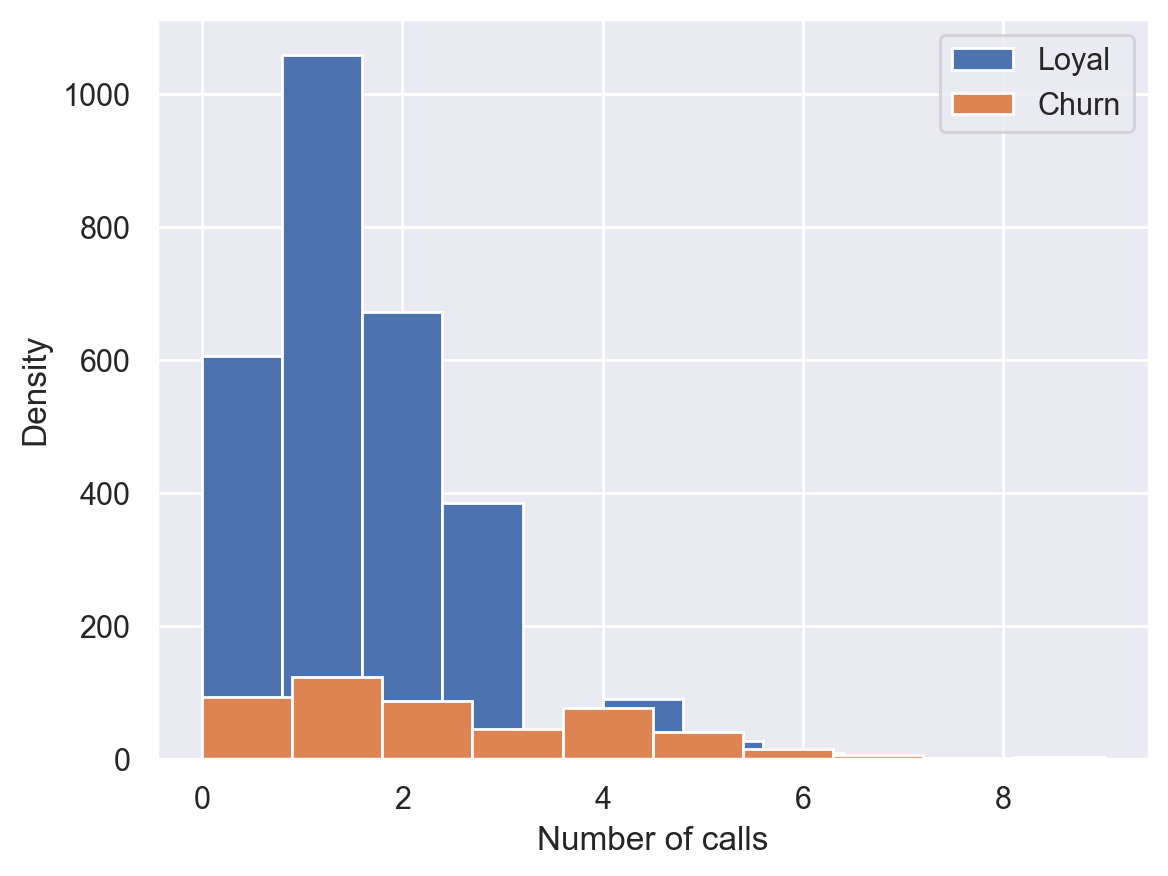

In [3]:
telecom_data = pd.read_csv(DATA_PATH + "telecom_churn.csv")

telecom_data.loc[telecom_data["Churn"] == False, "Customer service calls"].hist(
    label="Loyal"
)
telecom_data.loc[telecom_data["Churn"] == True, "Customer service calls"].hist(
    label="Churn"
)
plt.xlabel("Number of calls")
plt.ylabel("Density")
plt.legend()

In [4]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


# Save the data about the loyal and former customers to split the dataset
loyal_calls = telecom_data.loc[
    telecom_data["Churn"] == False, "Customer service calls"
].values
churn_calls = telecom_data.loc[
    telecom_data["Churn"] == True, "Customer service calls"
].values

# Set the seed for reproducibility of the results
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them
loyal_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)
]

# print(loyal_calls)
# for sample in get_bootstrap_samples(loyal_calls, 1000):
#     print(sample)

churn_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)
]

# Print the resulting interval estimates
print(
    "Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.05)
)
print(
    "Service calls from churn: mean interval", stat_intervals(churn_mean_scores, 0.05)
)

Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]


In [5]:
print(telecom_data["Customer service calls"])

0       1
1       1
2       0
3       2
4       3
       ..
3328    2
3329    3
3330    2
3331    2
3332    0
Name: Customer service calls, Length: 3333, dtype: int64


 Эти данные описывают среднее количесвто звонков, конкретно интервал в пределах которого производят звонки разные группы 
 
 **Comparison with Decision Trees and Bagging**

In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
from sklearn.datasets import make_circles
from sklearn.ensemble import (BaggingClassifier, BaggingRegressor,
                            RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

Text(0.5, 1.0, 'Random forest(with bagging inside) with bagging, MSE = 13.49')

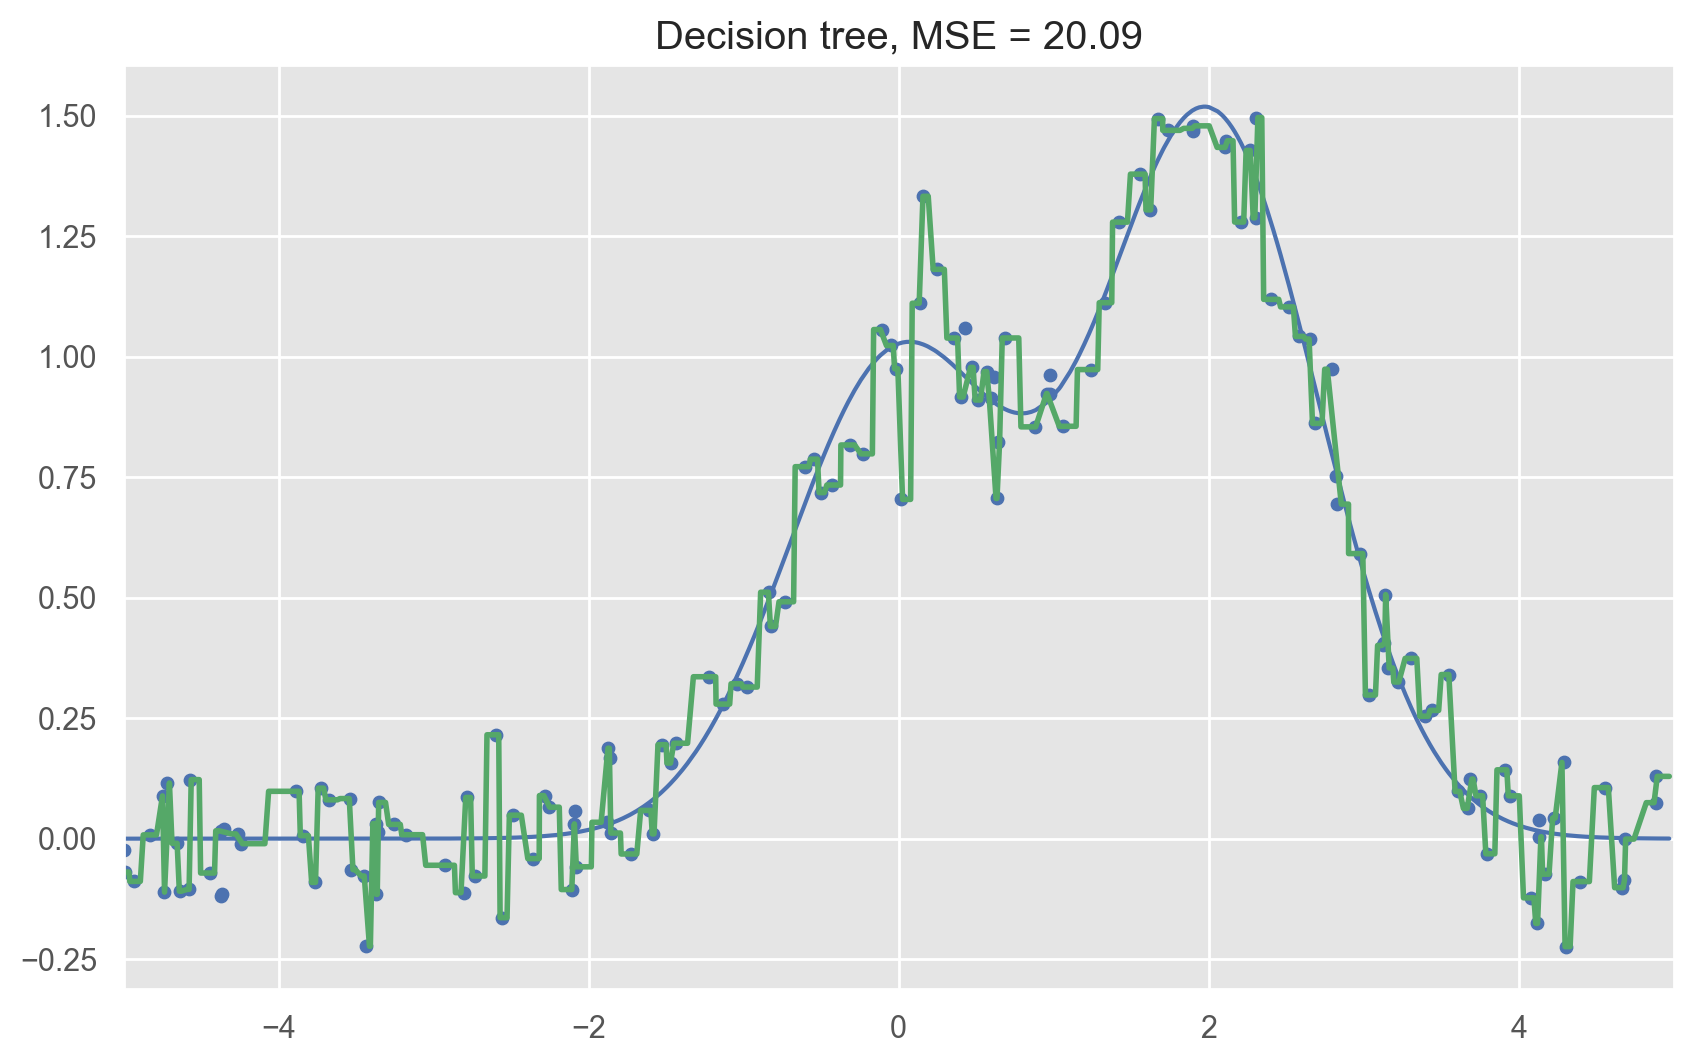

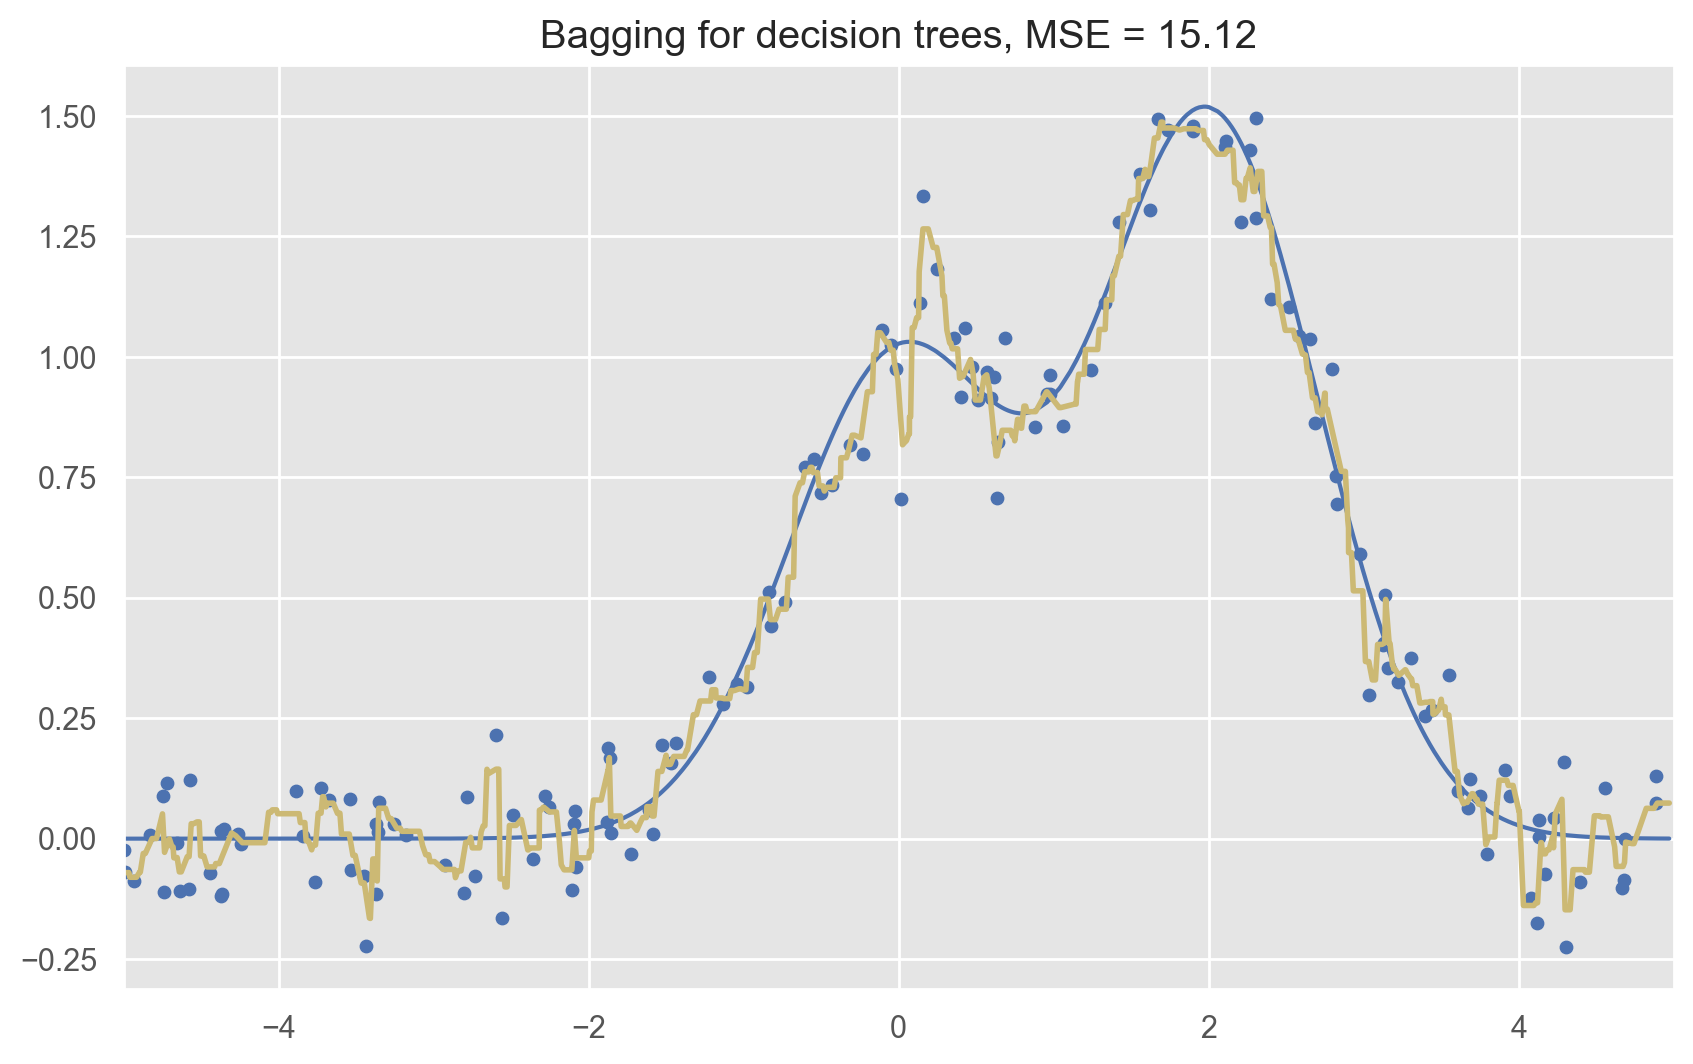

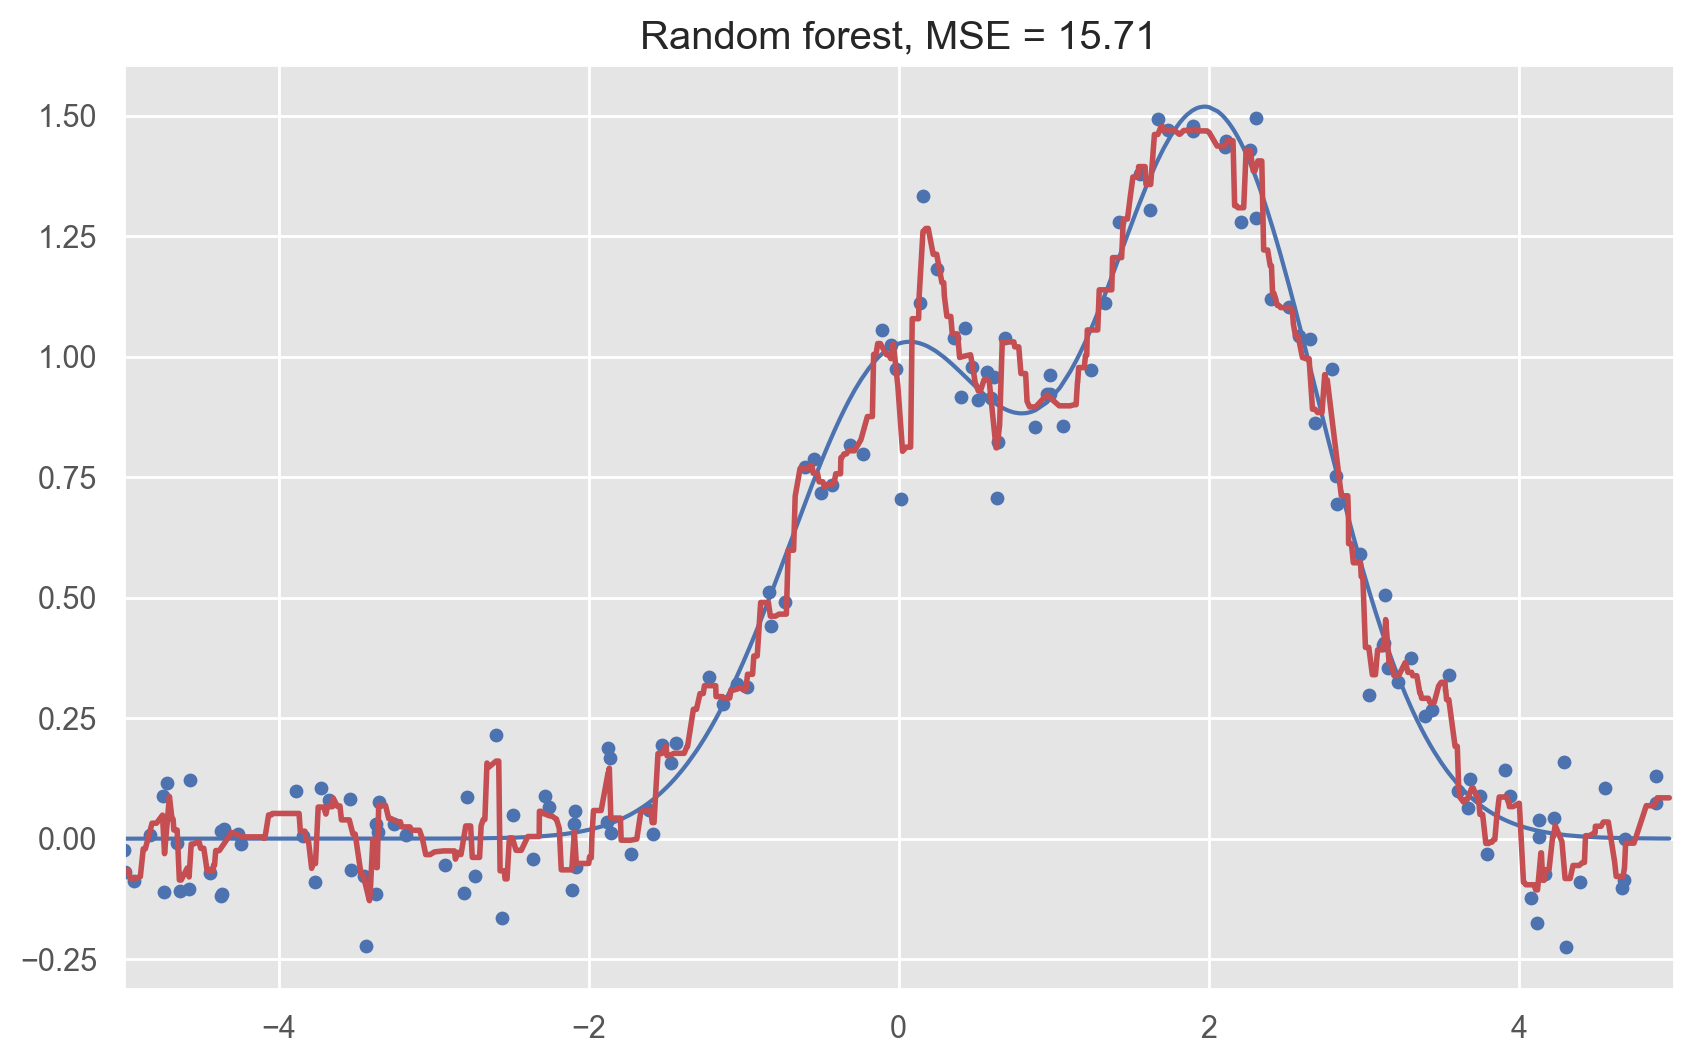

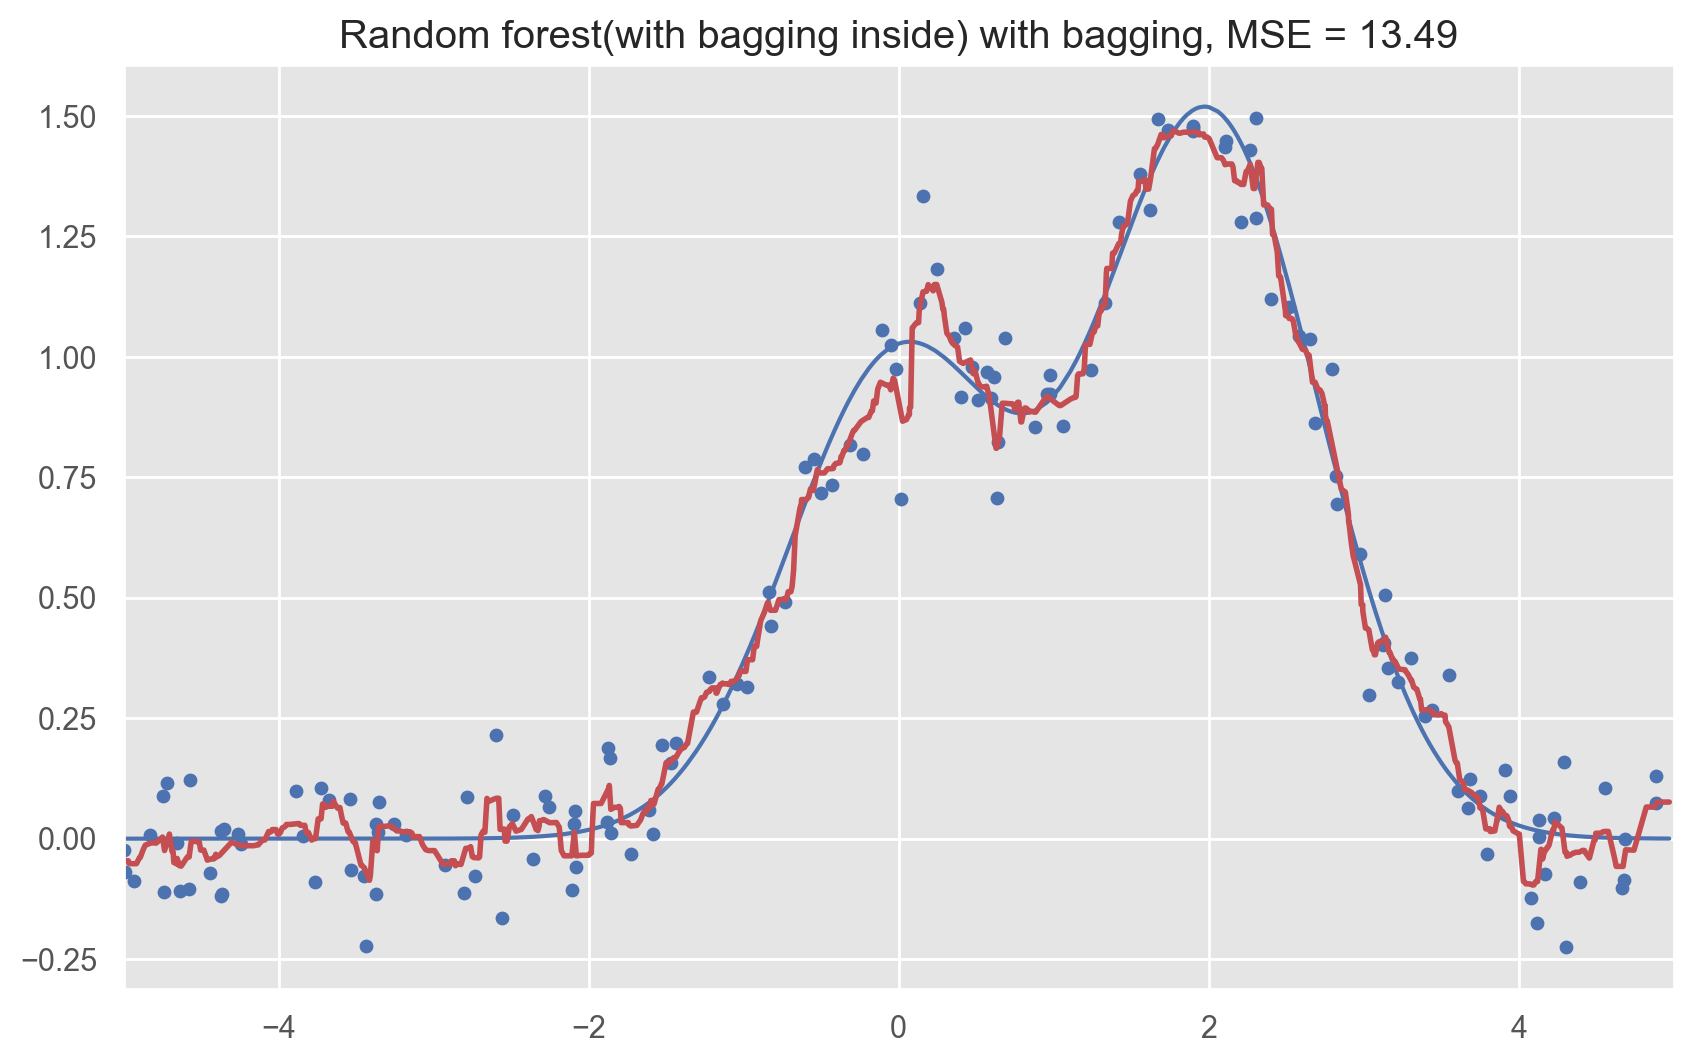

In [7]:
n_train = 150  
n_test = 1000  
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

# Bagging with a decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Bagging for decision trees, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2))

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
# rf_predict = rf.predict(X_test)

bdt2 = BaggingRegressor(rf).fit(X_train, y_train)
bdt2_predict = bdt2.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt2_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest(with bagging inside) with bagging, MSE = %.2f" % np.sum((y_test - bdt2_predict) ** 2))

проведем кросс-валидацию полученных значений 


In [8]:
from sklearn.model_selection  import cross_val_score

print("Mean squared error cv for decision tree: ", cross_val_score( dtree, X_train, y_train).mean())
print("Mean squared error cv for bagging with decision tree: ", cross_val_score( bdt, X_train, y_train).mean())
print("Mean squared error cv for random forest: ", cross_val_score( rf, X_train, y_train).mean())
print("Mean squared error cv for bagging with random forest: ", cross_val_score( bdt2, X_train, y_train).mean())

Mean squared error cv for decision tree:  -1.681604395890582
Mean squared error cv for bagging with decision tree:  -2.3104258378565516
Mean squared error cv for random forest:  -1.99601086198264
Mean squared error cv for bagging with random forest:  -2.183344390771606


In [9]:
# Disable warnings in Anaconda
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [10]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [11]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [12]:
data = pd.read_csv(DATA_PATH + "credit_scoring_sample.csv", sep=";")
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [13]:
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [14]:
data.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

Distribution of the target:


SeriousDlqin2yrs
0    0.777511
1    0.222489
Name: count, dtype: float64

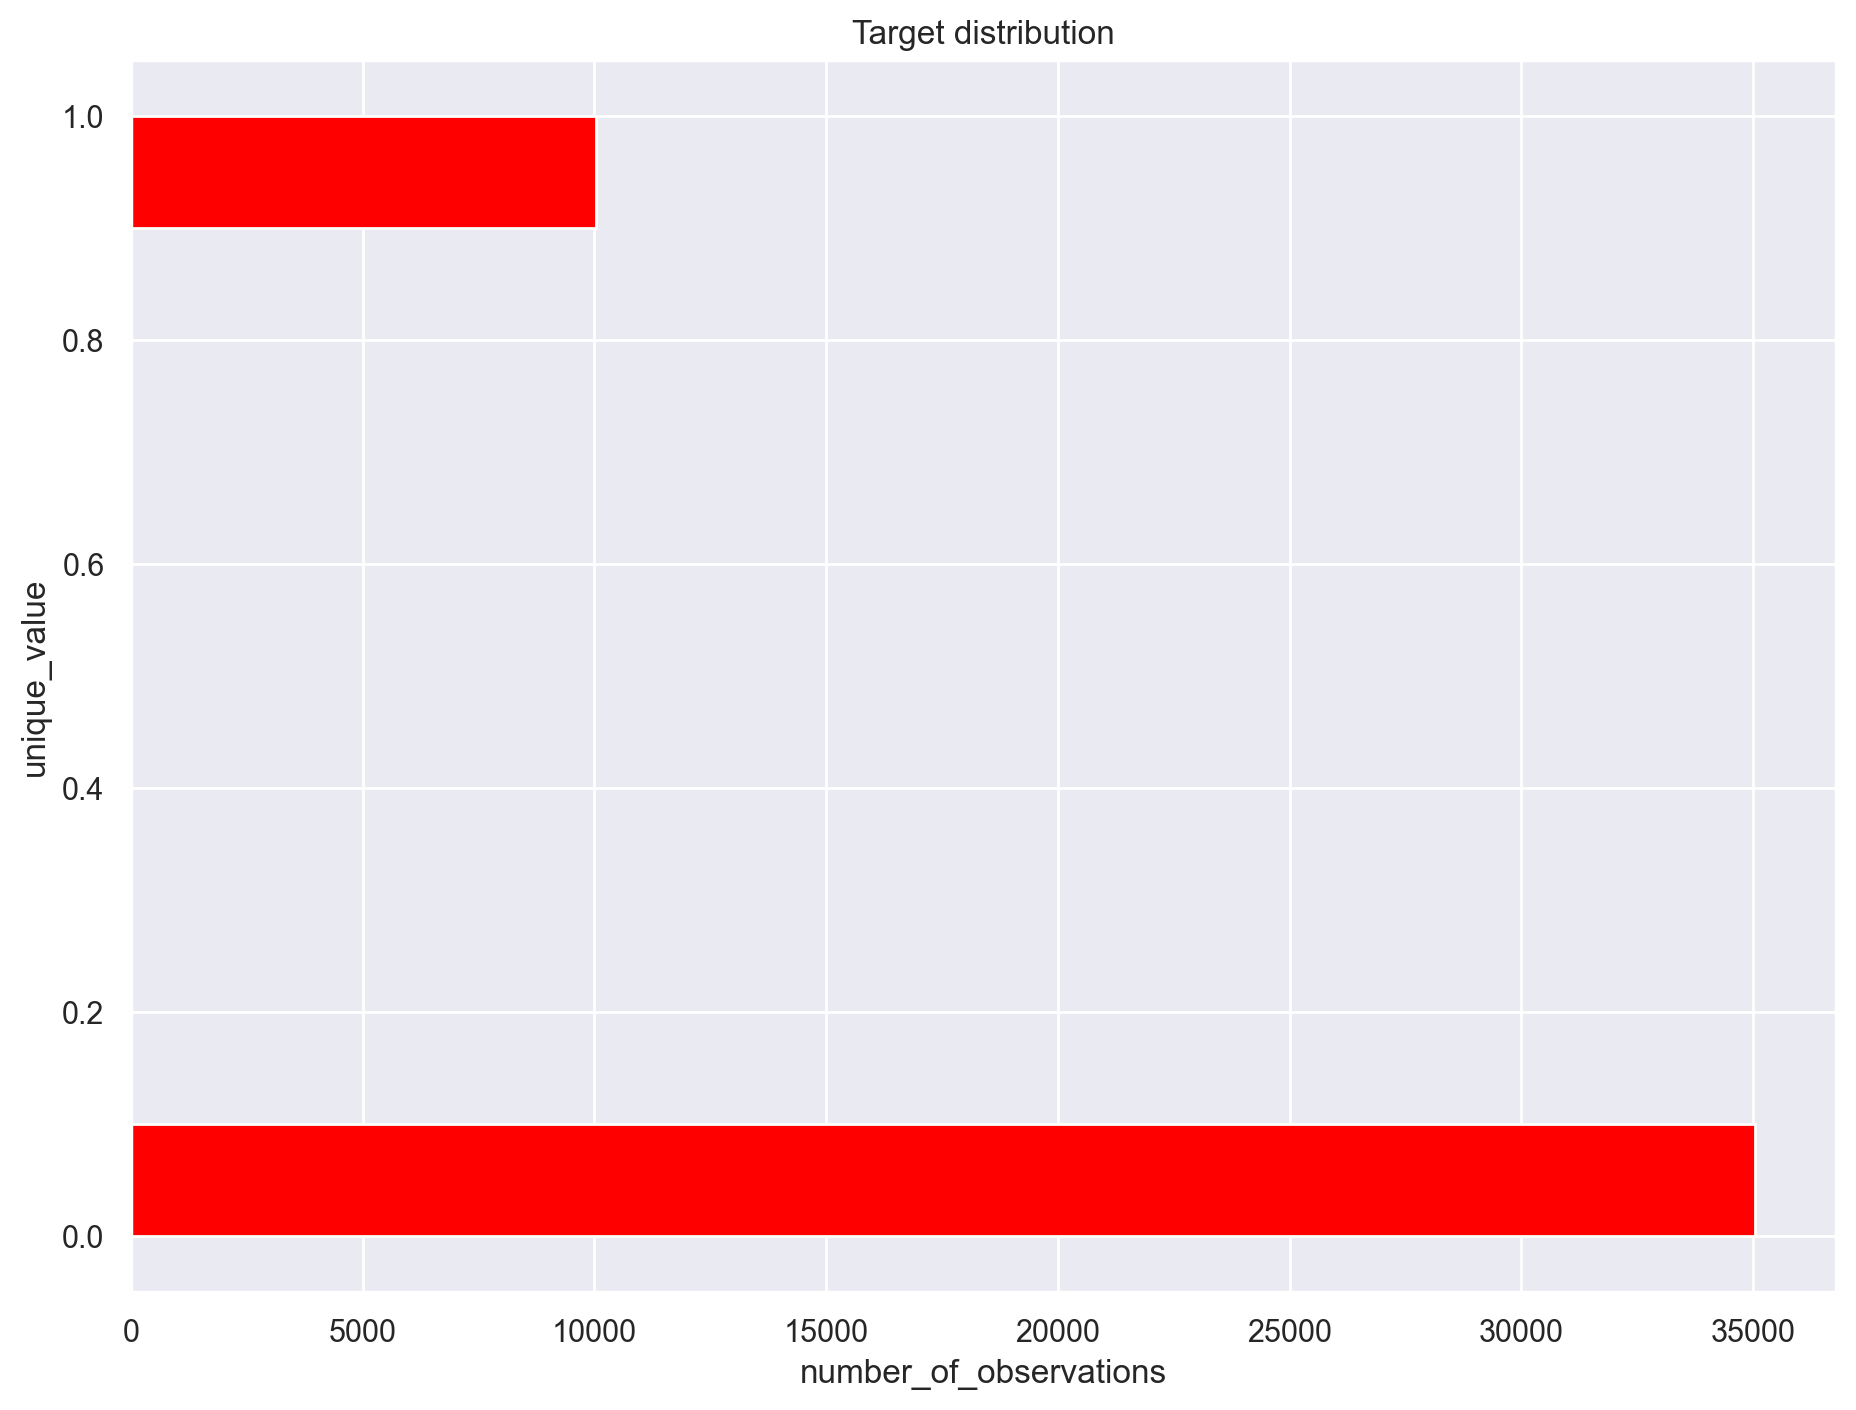

In [15]:
ax = data["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of the target:")
data["SeriousDlqin2yrs"].value_counts() / data.shape[0]

In [16]:
independent_columns_names = [x for x in data if  x != "SeriousDlqin2yrs"]
independent_columns_names


['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [17]:
table = fill_nan(data)
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

**Bootstrapping**

Question 2. Make an interval estimate of the average age for the customers who delayed repayment at the 90% confidence level. Use the example from the

article as reference, if needed. Also, use np.random.seed(0) as before. What is the resulting interval estimate?


In [18]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


# Save the data about the loyal and former customers to split the dataset
loyal_dept = data.loc[
    (data["SeriousDlqin2yrs"] == 1), "age"
].values
nonloyal_dept = data.loc[
    (data["SeriousDlqin2yrs"] == 0), "age"
].values

# Set the seed for reproducibility of the results
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them
loyal_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(loyal_dept, 1000)
]

# for sample in get_bootstrap_samples(loyal_dept, 1000):
#     print(sample)

nonloyal_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(nonloyal_dept, 1000)
]

# Print the resulting interval estimates
print(
    "Age from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.1)
)
# print(
#     "Age from churn: mean interval", stat_intervals(nonloyal_mean_scores, )
# )


Age from loyal: mean interval [45.71379414 46.12700479]


90% confidence level it's situation, when our alpha will be equal 0.1 Age from loyal: mean interval [45.71379414 46.12700479]


**Logistic regression**


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [20]:
lr = LogisticRegression(random_state=5, class_weight="balanced")

In [21]:
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X)
clf = GridSearchCV(lr, param_grid=parameters, scoring="roc_auc", cv=skf.split(X, y))
clf.fit(X, y)
print(clf.best_params_, clf.best_score_)

{'C': 0.001} 0.8089120626797153


Question 3. Perform a Grid Search with the scoring metric “roc_auc” for the parameter C. Which value of the parameter C is optimal?

Answer : 0.001 score=0.80

In [25]:
for i in parameters:
    print(i[0][0])

C


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
best_par = []
# x_scaled = sc.fit_transform(x)
clf2 = GridSearchCV(lr, parameters, scoring='roc_auc')
clf2.fit(X, y)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          random_state=5),
             param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             scoring='roc_auc')

In [27]:
print(clf2.best_score_, clf2.best_params_)

0.8041517315563732 {'C': 0.001}


In [28]:
for i in parameters['C']:
    print(i)

0.0001
0.001
0.01
0.1
1
10


In [29]:
print(clf.cv_results_['std_test_score'][clf.best_index_])
print(clf.cv_results_['mean_test_score'][clf.best_index_])

0.008137559189742445
0.8089120626797153


**Question 4.** Can we consider the best model stable? The model is stable if the standard deviation on validation is less than 0.5%. Save the ROC AUC value 

of the best model; it will be useful for the following tasks ? No, because of our std = 0.8%





**Feature importance**

**Question 5.** Feature importance is defined by the absolute value of its corresponding coefficient. First, you need to normalize all of the feature 

values so that it will be valid to compare them. What is the most important feature for the best logistic regression model?

    age

    NumberOfTime30-59DaysPastDueNotWorse

    DebtRatio

    NumberOfTimes90DaysLate

    NumberOfTime60-89DaysPastDueNotWorse

    MonthlyIncome

    NumberOfDependents


In [30]:
from sklearn.model_selection import train_test_split

lr = LogisticRegression(C=0.001, random_state=5, class_weight="balanced")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

scaler = StandardScaler()
Xt_scaled = scaler.fit_transform(X_train)
Xh_scaled = scaler.transform(X_test)
lr.fit(Xt_scaled, y_train)
pred = lr.predict(Xh_scaled)
names = {}
for i in range(7):
    names[X.columns[i]] = (lr.coef_[0][i])
data = {'Names':names}
coef_lr_df = pd.DataFrame(data)
print(coef_lr_df.sort_values)
print(lr.coef_)


<bound method DataFrame.sort_values of                                          Names
DebtRatio                            -0.034184
MonthlyIncome                        -0.140015
NumberOfDependents                    0.098968
NumberOfTime30-59DaysPastDueNotWorse  0.559610
NumberOfTime60-89DaysPastDueNotWorse  0.154289
NumberOfTimes90DaysLate               0.402150
age                                  -0.409353>
[[-0.40935307  0.55960997 -0.03418394  0.40214957  0.15428859 -0.14001514
   0.09896844]]


In [31]:
def softmax(f):
    return np.exp(f)/ np.sum(np.exp(f))
print(softmax(lr.coef_[0]))
# print(X.columns)
func = softmax(lr.coef_[0])
names = {}
for i in range(7):
    names[X.columns[i]] = (func[i])
data = {'Names':names}
coef_lr_df = pd.DataFrame(data)
print(coef_lr_df)


[0.08284735 0.21832021 0.12056258 0.18651328 0.14556773 0.10845526
 0.13773359]
                                         Names
DebtRatio                             0.120563
MonthlyIncome                         0.108455
NumberOfDependents                    0.137734
NumberOfTime30-59DaysPastDueNotWorse  0.218320
NumberOfTime60-89DaysPastDueNotWorse  0.145568
NumberOfTimes90DaysLate               0.186513
age                                   0.082847


In [32]:
lr2 = LogisticRegression(C= 0.01, random_state=5, class_weight="balanced")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)
# print(df2)

In [33]:
lr2.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=5)

In [34]:
pred2 = lr2.predict(X_test)

In [51]:
print(np.exp(lr2.coef_[0][0] * 20)) ##OR we can calculate this using exp and coeff
print(X_test.columns)

0.7823545105511303
Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome', 'NumberOfDependents'],
      dtype='object')


**Random Forest**


Question 8. How much higher is the ROC AUC of the best random forest model than that of the best logistic regression on validation? Select the closest 

answer.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)


rf = RandomForestClassifier(
    n_estimators=100, n_jobs=-1, random_state=42, class_weight="balanced"
)

parameters = {
    "max_features": [1, 2, 4],
    "min_samples_leaf": [3, 5, 7, 9],
    "max_depth": [5, 10, 15],
}

rf = GridSearchCV(rf, param_grid=parameters, scoring="roc_auc", cv=skf.split(X, y))
rf.fit(X, y)
print(clf.best_params_, clf.best_score_)

{'C': 0.001} 0.8089120626797153


In [53]:
print(rf.best_params_, rf.best_score_)

{'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 9} 0.8357785451032532


In [57]:
print("answer :", format(rf.best_score_ - clf.best_score_))

answer : 0.026866482423537952


**Question 9. What feature has the weakest impact in the Random Forest model?**

In [66]:
rf2 = rf = RandomForestClassifier(
    max_depth=10, max_features=2, min_samples_leaf= 9, n_estimators=100, n_jobs=-1, random_state=42, class_weight="balanced"
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)
# scaler = StandardScaler()
# Xt_scaled = scaler.fit_transform(X_train)
# Xh_scaled = scaler.transform(X_test)
rf2.fit(Xt_scaled, y_train)
pred = rf2.predict(Xh_scaled)
names = {}
for i in range(7):
    names[X.columns[i]] = (rf2.feature_importances_[i])
data = {'Names':names}
coef_rf = pd.DataFrame(data)
print(coef_rf.sort_values)

<bound method DataFrame.sort_values of                                          Names
DebtRatio                             0.080671
MonthlyIncome                         0.063433
NumberOfDependents                    0.014969
NumberOfTime30-59DaysPastDueNotWorse  0.281866
NumberOfTime60-89DaysPastDueNotWorse  0.158935
NumberOfTimes90DaysLate               0.276724
age                                   0.123401>


**Question 10. What is the most significant advantage of using Logistic Regression versus Random Forest for this problem?**



    Spent less time for model fitting;

    Fewer variables to iterate;

    Feature interpretability;

    Linear properties of the algorithm.


Answer : Spent less time for model fitting; - No , correct answer this - Feature interpretability;



**Question 11. Fit a bagging classifier with random_state=42. For the base classifiers, use 100 logistic regressors and use RandomizedSearchCV instead of GridSearchCV. It will take a lot of time to iterate over all 54 variants, so set the maximum number of iterations for RandomizedSearchCV to 20. Don’t forget to set the parameters cv and random_state=1. What is the best ROC AUC you achieve?**

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

parameters = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100],
}

In [77]:
%%time
model = BaggingClassifier(LogisticRegression(), 
                n_estimators=100, 
                bootstrap = True, random_state = 42)
grid_r = RandomizedSearchCV(model,parameters,n_iter=54, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=5), scoring='roc_auc', random_state=1)
grid_r2 = RandomizedSearchCV(model,parameters,n_iter=20, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=5), scoring='roc_auc', random_state=1)

CPU times: total: 0 ns
Wall time: 0 ns


In [78]:
grid_r2.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   estimator=BaggingClassifier(estimator=LogisticRegression(),
                                               n_estimators=100,
                                               random_state=42),
                   n_iter=20,
                   param_distributions={'base_estimator__C': [0.0001, 0.001,
                                                              0.01, 1, 10,
                                                              100],
                                        'max_features': [2, 3, 4],
                                        'max_samples': [0.5, 0.7, 0.9]},
                   random_state=1, scoring='roc_auc')

In [82]:
%%time
model = BaggingClassifier(LogisticRegression(class_weight='balanced'), 
                n_estimators=100, 
                bootstrap = True, random_state = 42)
grid_r = RandomizedSearchCV(model,parameters,n_iter=20, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=5), scoring='roc_auc', random_state=1)
grid_r.fit(X, y)
print(grid_r2.best_score_)

0.7731887326198078
CPU times: total: 12min 3s
Wall time: 10min 24s


In [80]:
print(grid_r2.best_score_)

0.7731887326198078


In [83]:
print(grid_r.best_score_)

0.8087951623513827


**Answer:** 80,8 %

Question 12. Give an interpretation of the best parameters for bagging. Why are these values of max_features and max_samples the best?

    For bagging it’s important to use as few features as possible;

    Bagging works better on small samples;

    Less correlation between single models;

    The higher the number of features, the lower the loss of information.

    **Answer:** Less correlation between single models;


In [87]:
import cv2

cap = cv2.VideoCapture(1)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 2448)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 2048)

n = 1
for i in range(50):
    cap.read()

for i in range(10000):
    cap.read()
    ret, frame = cap.read()

     cv2.imshow("result", cv2.resize(frame, (2000, 2000), interpolation=cv2.INTER_AREA))

    keyboard = cv2.waitKey(100)
    print(keyboard)
    if i % 10 == 0 or keyboard == 's':
        cv2.imwrite('C:/Users/nuke/Desktop/mlcourses/im1.png', frame)
    n = n + 1

    if keyboard == 'q':
        break 
cap.release()

-1


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [85]:
pip install opencv-contrib-python

     ---------------------------------------- 44.8/44.8 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
import numpy as np
mas = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9]
D = 0
X = np.sum(mas) / len(mas)
for i in range (len(mas)):
    D = D + (mas[i] - X)**2
std = np.sqrt(D / (len(mas) - 1))

In [89]:
print(std)

3.1622776601683795
